## Hospedagens em Recife
Buscamos analisar as mudanças sazonais do preço das hospedagens em recife

In [1]:
import pandas as pd
import numpy as np

In [3]:
# carregando o dataset completo
hosp = pd.read_csv('../resultado1.csv', decimal=".")

## Definindo o tipo dos dados

In [4]:
hosp['checkin'] = pd.to_datetime(hosp['checkin'])
hosp['checkout'] = pd.to_datetime(hosp['checkout'])
hosp['cidade'] = hosp["cidade"].astype("category")
hosp['hotel'] = hosp["hotel"].astype("category")
hosp['data_extracao'] = hosp["data_extracao"].astype("category")

In [5]:
hosp['mes_checkin'] = hosp['checkin'].dt.month

In [31]:
# pegando do dataset apenas os dados até junho de 2025 para comparar um ano inteiro sem repetições
hospedagens = hosp[~((hosp['checkin'].dt.month > 6) & (hosp['checkin'].dt.year == 2025))]


In [7]:
# confirmando o tipo dos dados
hospedagens.dtypes

hotel                    category
cidade                   category
preço                       int64
checkin            datetime64[ns]
checkout           datetime64[ns]
dist_centro               float64
dist_praia                float64
avaliacao                 float64
qtnd_avaliacoes           float64
data_extracao            category
mes_checkin                 int32
dtype: object

## Estatísticas Iniciais

In [ ]:
# tamanho dos dados
hospedagens.shape

(15643, 11)

In [ ]:
# visualizando as colunas 
hospedagens.columns

Index(['hotel', 'cidade', 'preço', 'checkin', 'checkout', 'dist_centro',
       'dist_praia', 'avaliacao', 'qtnd_avaliacoes', 'data_extracao',
       'mes_checkin'],
      dtype='object')

In [ ]:
# agrupamos os dados por mês para entender a média dos preços de cada mês
preco_medio_mensal = hospedagens.groupby(pd.Grouper(key='checkin', freq="M"))['preço'].mean()
preco_medio_mensal

checkin
2024-07-31    1853.438967
2024-08-31    1852.081880
2024-09-30    1936.745310
2024-10-31    1977.388763
2024-11-30    2011.614892
2024-12-31    2269.954579
2025-01-31    2461.325480
2025-02-28    2248.170360
2025-03-31    2720.275000
2025-04-30    2325.341146
2025-05-31    2297.971154
2025-06-30    2122.087601
Freq: M, Name: preço, dtype: float64

In [ ]:
# número de acomodações aparecendo por mês
num_hospedagens_mes = hospedagens.groupby(pd.Grouper(key='checkin', freq="M"))['preço'].count()
num_hospedagens_mes

checkin
2024-07-31    2130
2024-08-31    2064
2024-09-30    1759
2024-10-31    1762
2024-11-30    1719
2024-12-31    1343
2025-01-31    1146
2025-02-28     722
2025-03-31     760
2025-04-30     768
2025-05-31     728
2025-06-30     742
Freq: M, Name: preço, dtype: int64

In [ ]:
# calculando o desvio padrão dos preços médios dos meses
preco_medio_mensal['price_change'] = preco_medio_mensal.std()
preco_medio_mensal['price_change']


263.601427112874

<Axes: >

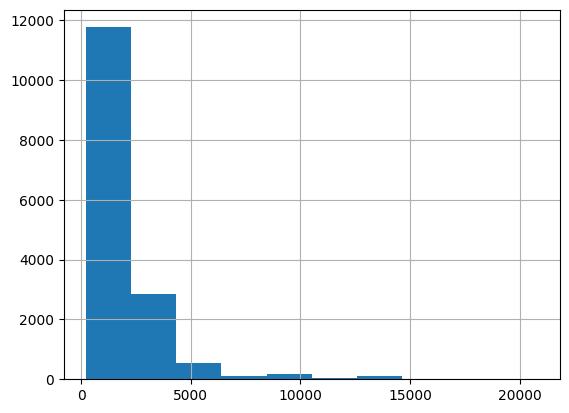

In [ ]:
# hiistograma do preço de estadia por 7 dias
hospedagens['preço'].hist()

C:\Users\Clara\AppData\Local\Temp\ipykernel_5028\690311496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospedagens['log_price'] = hospedagens['preço'].apply(np.log10)


<Axes: >

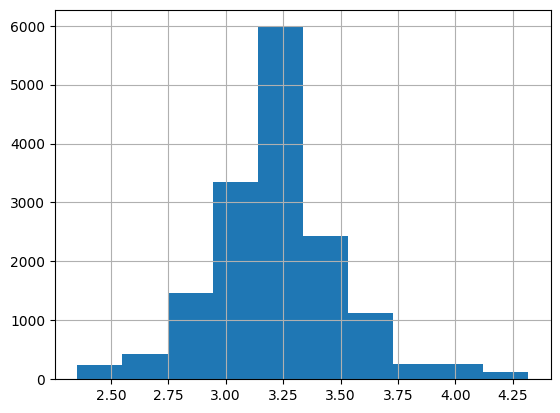

In [32]:
hospedagens['log_price'] = hospedagens['preço'].apply(np.log10)
hospedagens[hospedagens['log_price'] > 0]['log_price'].hist()

## Definindo dados faltantes

In [ ]:
# printando quantas linhas de cada coluna está faltante
print(hospedagens.isnull().sum())

hotel                 0
cidade                0
preço                 0
checkin               0
checkout              0
dist_centro           0
dist_praia         4606
avaliacao          3133
qtnd_avaliacoes    3133
data_extracao         0
mes_checkin           0
log_price             0
dtype: int64


<Axes: >

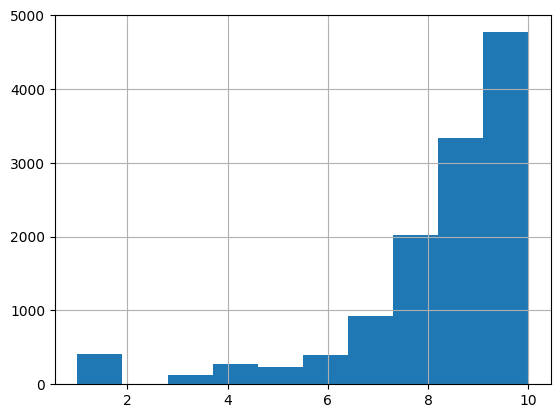

In [ ]:
# vamos plotar histogramas das colunas com dados faltantes para entender as particularidades
hospedagens["avaliacao"].hist()

<Axes: >

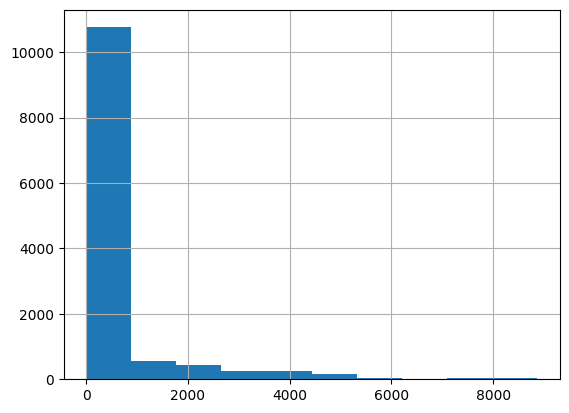

In [ ]:
hospedagens["qtnd_avaliacoes"].hist()

<Axes: >

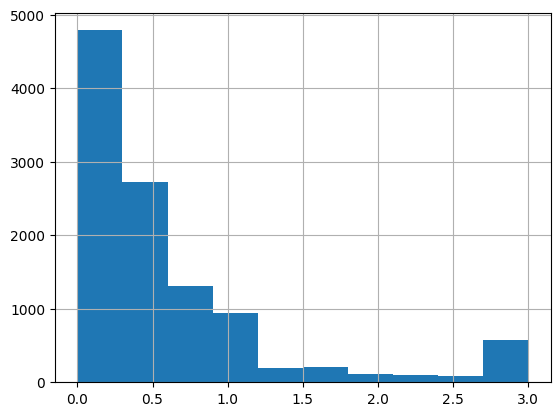

In [ ]:
hospedagens["dist_praia"].hist()

In [9]:
# gerando um novo dataset a partir do csv com os dados e transformando os dados categóricos em numérico
hosp_input = pd.read_csv('../resultado1.csv', decimal=".")
hosp_input['checkin'] = pd.to_datetime(hosp_input['checkin'])
hosp_input['mes_checkin'] = hosp_input['checkin'].dt.month
hosp_inputedagens = hosp_input[~((hosp_input['checkin'].dt.month > 6) & (hosp_input['checkin'].dt.year == 2025))]
hosp_input['checkin'] = hosp_input['checkin'].astype("category")
hosp_input['checkout'] = hosp_input['checkout'].astype("category")
hosp_input['cidade'] = hosp_input["cidade"].astype("category")
hosp_input['hotel'] = hosp_input["hotel"].astype("category")
hosp_input['data_extracao'] =hosp_input["data_extracao"].astype("category")
hosp_input['hotel'] = hosp_input['hotel'].cat.codes
hosp_input['checkin'] = hosp_input['checkin'].cat.codes
hosp_input['checkout'] = hosp_input['checkout'].cat.codes
hosp_input['cidade'] = hosp_input['cidade'].cat.codes
hosp_input['data_extracao'] = hosp_input['data_extracao'].cat.codes

In [ ]:
# entendendo a correlação dos dados a partir do método spearman
hosp_input.corr(method="spearman")

hotel  cidade     preço   checkin  checkout  dist_centro  \
hotel            1.000000     NaN -0.042618 -0.038618 -0.038614    -0.049422   
cidade                NaN     NaN       NaN       NaN       NaN          NaN   
preço           -0.042618     NaN  1.000000  0.044975  0.045242     0.117771   
checkin         -0.038618     NaN  0.044975  1.000000  0.990569    -0.011076   
checkout        -0.038614     NaN  0.045242  0.990569  1.000000    -0.010688   
dist_centro     -0.049422     NaN  0.117771 -0.011076 -0.010688     1.000000   
dist_praia       0.071000     NaN -0.174187  0.025473  0.025448    -0.207954   
avaliacao       -0.137858     NaN  0.119423  0.028097  0.027424    -0.048533   
qtnd_avaliacoes  0.132421     NaN  0.059913 -0.099139 -0.098397     0.152088   
data_extracao         NaN     NaN       NaN       NaN       NaN          NaN   
mes_checkin      0.016777     NaN -0.046750 -0.304321 -0.304321     0.009344   

                 dist_praia  avaliacao  qtnd_avaliacoes  data_extracao  \
hotel              0.071000  -0.137858         0.132421            NaN   
cidade                  NaN        NaN              NaN            NaN   
preço             -0.174187   0.119423         0.059913            NaN   
checkin            0.025473   0.028097        -0.099139            NaN   
checkout           0.025448   0.027424        -0.098397            NaN   
dist_centro       -0.207954  -0.048533         0.152088            NaN   
dist_praia         1.000000  -0.058528        -0.223552            NaN   
avaliacao         -0.058528   1.000000        -0.216860            NaN   
qtnd_avaliacoes   -0.223552  -0.216860         1.000000            NaN   
data_extracao           NaN        NaN              NaN            NaN   
mes_checkin       -0.020492  -0.009371         0.053884            NaN   

                 mes_checkin  
hotel               0.016777  
cidade                   NaN  
preço              -0.046750  
checkin            -0.304321  
checkout           -0.304321  
dist_centro         0.009344  
dist_praia         -0.020492  
avaliacao          -0.009371  
qtnd_avaliacoes     0.053884  
data_extracao            NaN  
mes_checkin         1.000000

In [ ]:
# normalizando os dados
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['preço', 'dist_centro', 'dist_praia', 'avaliacao', 'qtnd_avaliacoes']
scaler = MinMaxScaler()

hosp_input[columns_to_normalize] = scaler.fit_transform(hosp_input[columns_to_normalize])

print(hosp_input)

       hotel  cidade     preço  checkin  checkout  dist_centro  dist_praia  \
0        476       0  0.074051        0         3     0.088565    0.166667   
1        496       0  0.067001        0         3     0.050448    0.083333   
2        699       0  0.009822        0         3     0.000000    0.833333   
3         15       0  0.038168        0         3     0.011211         NaN   
4        695       0  0.074148        0         3     0.076233    0.216667   
...      ...     ...       ...      ...       ...          ...         ...   
16900    410       0  0.209899       54        53     0.048206    0.066667   
16901    459       0  0.126854       54        53     0.098655    0.300000   
16902    527       0  0.131716       54        53     0.183857    0.166667   
16903     20       0  0.185054       54        53     0.091928         NaN   
16904    216       0  0.785433       54        53     0.060538         NaN   

       avaliacao  qtnd_avaliacoes  data_extracao  mes_checkin  

In [ ]:
# rodando o KNN impute para imputar os dados faltantes
from fancyimpute import KNN
hosp_knn = KNN(k=3).fit_transform(hosp_input)

Imputing row 1/16905 with 0 missing, elapsed time: 196.546
Imputing row 101/16905 with 0 missing, elapsed time: 196.763
Imputing row 201/16905 with 0 missing, elapsed time: 196.840
Imputing row 301/16905 with 0 missing, elapsed time: 196.963
Imputing row 401/16905 with 0 missing, elapsed time: 197.209
Imputing row 501/16905 with 0 missing, elapsed time: 197.611
Imputing row 601/16905 with 1 missing, elapsed time: 197.691
Imputing row 701/16905 with 0 missing, elapsed time: 197.807
Imputing row 801/16905 with 0 missing, elapsed time: 197.940
Imputing row 901/16905 with 3 missing, elapsed time: 198.088
Imputing row 1001/16905 with 0 missing, elapsed time: 198.421
Imputing row 1101/16905 with 0 missing, elapsed time: 198.862
Imputing row 1201/16905 with 0 missing, elapsed time: 199.024
Imputing row 1301/16905 with 0 missing, elapsed time: 199.244
Imputing row 1401/16905 with 0 missing, elapsed time: 199.423
Imputing row 1501/16905 with 0 missing, elapsed time: 199.617
Imputing row 1601/16

In [ ]:
hosp2 = pd.DataFrame(data=hosp_knn[0:,0:],columns=['hotel', 'cidade', 'preço', 'checkin', 'checkout', 'dist_centro', 'dist_praia','avaliacao', 'qtnd_avaliacoes', 'data_extracao', 'mes_checkin'])

In [ ]:
# revertendo a normalização
hosp2[columns_to_normalize] = scaler.inverse_transform(hosp2[columns_to_normalize])

In [ ]:
hosp2.corr(method='spearman')

hotel  cidade     preço   checkin  checkout  dist_centro  \
hotel            1.000000     NaN -0.042618 -0.038618 -0.038614    -0.049422   
cidade                NaN     NaN       NaN       NaN       NaN          NaN   
preço           -0.042618     NaN  1.000000  0.044975  0.045242     0.117771   
checkin         -0.038618     NaN  0.044975  1.000000  0.990569    -0.011076   
checkout        -0.038614     NaN  0.045242  0.990569  1.000000    -0.010688   
dist_centro     -0.049422     NaN  0.117771 -0.011076 -0.010688     1.000000   
dist_praia       0.059833     NaN -0.127204  0.005321  0.006009    -0.171829   
avaliacao       -0.158692     NaN  0.109818  0.035479  0.034054    -0.032356   
qtnd_avaliacoes  0.151086     NaN  0.044803 -0.126917 -0.125264     0.114594   
data_extracao         NaN     NaN       NaN       NaN       NaN          NaN   
mes_checkin      0.016777     NaN -0.046750 -0.304321 -0.304321     0.009344   

                 dist_praia  avaliacao  qtnd_avaliacoes  data_extracao  \
hotel              0.059833  -0.158692         0.151086            NaN   
cidade                  NaN        NaN              NaN            NaN   
preço             -0.127204   0.109818         0.044803            NaN   
checkin            0.005321   0.035479        -0.126917            NaN   
checkout           0.006009   0.034054        -0.125264            NaN   
dist_centro       -0.171829  -0.032356         0.114594            NaN   
dist_praia         1.000000  -0.043293        -0.158911            NaN   
avaliacao         -0.043293   1.000000        -0.229742            NaN   
qtnd_avaliacoes   -0.158911  -0.229742         1.000000            NaN   
data_extracao           NaN        NaN              NaN            NaN   
mes_checkin       -0.016276  -0.008352         0.059890            NaN   

                 mes_checkin  
hotel               0.016777  
cidade                   NaN  
preço              -0.046750  
checkin            -0.304321  
checkout           -0.304321  
dist_centro         0.009344  
dist_praia         -0.016276  
avaliacao          -0.008352  
qtnd_avaliacoes     0.059890  
data_extracao            NaN  
mes_checkin         1.000000

In [ ]:
# mediana antiga
hosp_input[columns_to_normalize] = scaler.inverse_transform(hosp2[columns_to_normalize])
hosp_input.median()

hotel              3.810000e+02
cidade             0.000000e+00
preço              3.352444e+07
checkin            1.700000e+01
checkout           1.700000e+01
dist_centro        6.067600e+02
dist_praia         1.215788e+00
avaliacao          7.930000e+01
qtnd_avaliacoes    1.063210e+05
data_extracao      0.000000e+00
mes_checkin        8.000000e+00
dtype: float64

In [ ]:
#nova mediana
hosp2.median()

hotel               381.000000
cidade                0.000000
preço              1630.000000
checkin              17.000000
checkout             17.000000
dist_centro           6.800000
dist_praia            0.405263
avaliacao             8.700000
qtnd_avaliacoes      12.000000
data_extracao         0.000000
mes_checkin           8.000000
dtype: float64

## Outliers


<Axes: >

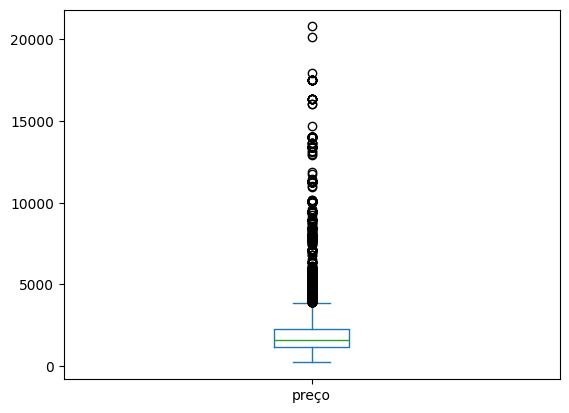

In [ ]:
hosp[['preço']].plot(kind='box')


In [ ]:
hosp[hosp['preço'] >= 15000] 

hotel  cidade  preço  \
514         Bangalô à beira mar na Praia dos Carneiros  Recife  17955   
3637        Bangalô à beira mar na Praia dos Carneiros  Recife  16074   
4137        Bangalô à beira mar na Praia dos Carneiros  Recife  16074   
4603        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
5044        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
5481        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
5920        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
6352        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
7233        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
7683        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
8123        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
8552        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
8970        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
9403        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
9773        Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
10139       Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
10486       Bangalô à beira mar na Praia dos Carneiros  Recife  17523   
10610  RESERVA DO PAIVA - A MELHOR CASA PARA TEMPORADA  Recife  20793   
10858  RESERVA DO PAIVA - A MELHOR CASA PARA TEMPORADA  Recife  20173   
15819                               Casa para Carnaval  Recife  16380   
15994                               Casa para Carnaval  Recife  16380   
16169                               Casa para Carnaval  Recife  16380   
16348                               Casa para Carnaval  Recife  16380   
16487                               Casa para Carnaval  Recife  16380   
16627                               Casa para Carnaval  Recife  16380   
16766                               Casa para Carnaval  Recife  16380   
16904                               Casa para Carnaval  Recife  16380   

         checkin   checkout  dist_centro  dist_praia  avaliacao  \
514   2024-07-01 2024-07-08         74.9         0.0        9.5   
3637  2024-08-15 2024-08-22         74.9         0.0        9.5   
4137  2024-08-22 2024-08-29         74.9         0.0        9.5   
4603  2024-09-01 2024-09-08         74.9         0.0        9.5   
5044  2024-09-08 2024-09-15         74.9         0.0        9.5   
5481  2024-09-15 2024-09-22         74.9         0.0        9.5   
5920  2024-09-22 2024-09-29         74.9         0.0        9.5   
6352  2024-10-01 2024-10-08         74.9         0.0        9.5   
7233  2024-10-15 2024-10-22         74.9         0.0        9.5   
7683  2024-10-22 2024-10-29         74.9         0.0        9.5   
8123  2024-11-01 2024-11-08         74.9         0.0        9.5   
8552  2024-11-08 2024-11-15         74.9         0.0        9.5   
8970  2024-11-15 2024-11-22         74.9         0.0        9.5   
9403  2024-11-22 2024-11-29         74.9         0.0        9.5   
9773  2024-12-01 2024-12-08         74.9         0.0        9.5   
10139 2024-12-08 2024-12-15         74.9         0.0        9.5   
10486 2024-12-15 2024-12-22         74.9         0.0        9.5   
10610 2024-12-22 2024-12-29         26.6         0.0        8.4   
10858 2025-01-01 2025-01-08         26.6         0.0        8.4   
15819 2025-07-01 2025-07-08          5.6         NaN        NaN   
15994 2025-07-08 2025-07-15          5.6         NaN        NaN   
16169 2025-07-15 2025-07-22          5.6         NaN        NaN   
16348 2025-07-22 2025-07-29          5.6         NaN        NaN   
16487 2025-08-01 2025-08-08          5.6         NaN        NaN   
16627 2025-08-08 2025-08-15          5.6         NaN        NaN   
16766 2025-08-15 2025-08-22          5.6         NaN        NaN   
16904 2025-08-22 2025-08-29          5.6         NaN        NaN   

       qtnd_avaliacoes data_extracao  mes_checkin  
514                4.0      2024-6-6            7  
3637               4.0 

<Axes: ylabel='Frequency'>

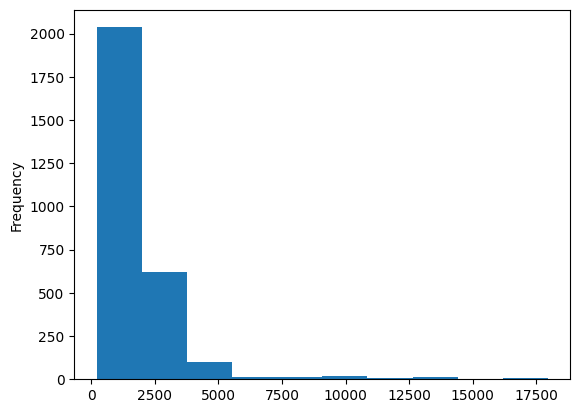

In [ ]:
hosp[hosp['mes_checkin'] == 7]['preço'].plot(kind='hist')


In [ ]:
from scipy.stats import skew

print(skew(hosp['preço']))

# o valor distante de zero representa um valor assimétrico

3.889425002531246


In [33]:
grouped = hospedagens.groupby('mes_checkin')['log_price']

q1_per_month = grouped.quantile(0.25)
q3_per_month = grouped.quantile(0.75)

iqr_per_month = q3_per_month - q1_per_month

print('iqr: ', iqr_per_month)

iqr:  mes_checkin
1     0.307016
2     0.343546
3     0.411842
4     0.376068
5     0.369050
6     0.393092
7     0.238398
8     0.235193
9     0.244503
10    0.247602
11    0.249763
12    0.282745
Name: log_price, dtype: float64


In [34]:
# Aplicar a condição de Tukey ajustada diretamente ao DataFrame original
hospedagens_clean = hospedagens.groupby('mes_checkin').apply(lambda x: x[
    (x['log_price'] >= (q1_per_month[x.name] - 1.5 * iqr_per_month[x.name])) &
    (x['log_price'] <= (q3_per_month[x.name] + 1.5 * iqr_per_month[x.name]))
]).reset_index(drop=True)

In [42]:
hospedagens_clean

hotel  cidade  preço  \
0                                      Villa d'Oro Hotel  Recife   1389   
1                                          Hotel Central  Recife    805   
2                             APARTAMENTO PROXIMO À UFPE  Recife    964   
3      Lindo APT Cinza à 50m do mar - Praia de Boa Vi...  Recife   1017   
4      Lar Recife Olinda - Hostel com suites individuais  Recife   1091   
...                                                  ...     ...    ...   
14684     Apto a beira-mar em Jaboatao dos Guararapes PE  Recife   4128   
14685                                  Hostel da Socorro  Recife   2835   
14686     Flat Equipado-Jaqueira Otima Localização-SH032  Recife   4544   
14687  Lindo apto à beira-mar Jaboatão dos Guararapes...  Recife   5514   
14688                               Aconchego Boa Viagem  Recife   4032   

         checkin   checkout  dist_centro  dist_praia  avaliacao  \
0     2025-01-01 2025-01-08          1.4         2.9        8.6   
1     2025-01-01 2025-01-08          0.8         NaN        7.3   
2     2025-01-01 2025-01-08          8.4         NaN        9.1   
3     2025-01-01 2025-01-08          5.8         NaN       10.0   
4     2025-01-01 2025-01-08          3.5         1.6        9.5   
...          ...        ...          ...         ...        ...   
14684 2024-12-22 2024-12-29         19.4         0.6        9.0   
14685 2024-12-22 2024-12-29          9.0         0.9        1.0   
14686 2024-12-22 2024-12-29          3.0         NaN        8.2   
14687 2024-12-22 2024-12-29         16.6         0.5        7.0   
14688 2024-12-22 2024-12-29          8.4         NaN        NaN   

       qtnd_avaliacoes data_extracao  mes_checkin  log_price  
0               1620.0      2024-6-6            1   3.142702  
1                393.0      2024-6-6            1   2.905796  
2                 14.0      2024-6-6            1   2.984077  
3                  1.0      2024-6-6            1   3.007321  
4                105.0      2024-6-6            1   3.037825  
...                ...           ...          ...        ...  
14684              2.0      2024-6-6           12   3.615740  
14685              1.0      2024-6-6           12   3.452553  
14686              6.0      2024-6-6           12   3.657438  
14687              1.0      2024-6-6           12   3.741467  
14688              NaN      2024-6-6           12   3.605521  

[14689 rows x 12 columns]